# Time Series

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

## Data Prep

Import diseases data

In [2]:
root = "../"
path = root + 'CSV/TabNet/Internacoes/'
all_files = glob.glob(path + "*")
df_diseases = pd.DataFrame()
list_of_diseases = []
for file in all_files:
    file_name = file.split("\\")[1]
    disease = file_name.split(".")[0]
    list_of_diseases.append(disease)
    df_disease = pd.read_csv(path + file_name, sep=";")
    df_disease = df_disease[df_disease["Município"] == "355030 São Paulo"]
    if not df_disease.empty:
        df_disease= df_disease.filter(regex='2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018', axis=1)
        df_disease = df_disease.transpose()
        df_disease.columns = [disease]
        df_disease = df_disease.replace("-",0)
        df_disease = df_disease.astype(int)
        df_diseases[disease] = df_disease[disease]
df_diseases = df_diseases.fillna(0)

In [3]:
from datetime import datetime
month_dic = {
    "Jan": "January",
    "Fev": "February",
    "Mar": "March",
    "Abr": "April",
    "Mai": "May",
    "Jun": "June",
    "Jul": "July",
    "Ago": "August",
    "Set": "September",
    "Out": "October",
    "Nov": "November",
    "Dez": "December"
}
indexes = []
for i,e in enumerate(df_diseases.index): 
    ano = e.split("/")[0]
    mes = e.split("/")[1]
    month = month_dic[mes]
    datetime_object = datetime.strptime(month, "%B")
    indexes.append(str(datetime_object.month) + "/" + str(ano))
df_diseases.index = indexes
df_diseases.head()

,ASMA,CANCER,DIABETES_MELLITUS,DOENCA_CARDIACA,DOENCA_DE_PARKINSON,DORSOPATIAS,DPOC,ENXAQUECA,EPILEPSIA,ESCLEROSE_MULTIPLA,HIPERTENSAO,HIV,INSUFICIENCIA_CARDIACA,INSUFICIENCIA_RENAL,OSTEOPOROSE,TECIDO_MOLE,TRANSTORNOS_MENTAIS_E_COMPORTAMENTAIS,TRAUMATISMO_INTRACRANIANO
1/2008,196,1804,366,1177,6,57,185,7,296,17,501,227,679,318,101,148,2916,658
2/2008,360,1626,366,1055,3,50,217,5,248,18,488,226,658,318,78,152,1316,608
3/2008,674,1840,347,1209,4,76,228,9,261,11,464,271,672,347,109,139,1390,594
4/2008,667,1790,334,1237,4,72,234,14,281,18,442,264,725,327,115,150,1478,622
5/2008,680,1885,367,1302,1,67,239,8,279,11,487,248,928,357,123,159,1484,734


Import suicide data

In [4]:
path = root + 'CSV/TabNet/Suicides/'
all_files = glob.glob(path + "*")
df_suicides = pd.DataFrame()
list_of_years = []
for file in all_files:
    file_name = file.split("\\")[1]
    year = file_name.split("_")[1].split(".")[0]
    list_of_years.append(year)
    df_year = pd.read_csv(path + file_name, sep=";")
    df_year = df_year.replace("-",0)
    df_year = df_year[df_year["Município"] == "355030 São Paulo"]
    df_year = df_year.drop(columns=["Município", "Total"])
    if not df_year.empty:
        df_year = df_year.transpose()
        df_year.columns = ["SUICIDE"]
        df_year = df_year.astype(int)
        df_year.index = df_year.index + "/" + year
        df_suicides = pd.concat([df_suicides, df_year])

In [5]:
from datetime import datetime
month_dic = {
    "Janeiro": "January",
    "Fevereiro": "February",
    "Março": "March",
    "Abril": "April",
    "Maio": "May",
    "Junho": "June",
    "Julho": "July",
    "Agosto": "August",
    "Setembro": "September",
    "Outubro": "October",
    "Novembro": "November",
    "Dezembro": "December"
}
indexes = []
for i,e in enumerate(df_suicides.index): 
    mes = e.split("/")[0]
    ano = e.split("/")[1]
    month = month_dic[mes]
    datetime_object = datetime.strptime(month, "%B")
    indexes.append(str(datetime_object.month) + "/" + str(ano))
df_suicides.index = indexes
df_suicides.head()

,SUICIDE
1/2008,43
2/2008,42
3/2008,50
4/2008,46
5/2008,38


In [6]:
df_final = df_diseases.copy()
df_final["SUICIDE"] = df_suicides["SUICIDE"]
df_final.head()

,ASMA,CANCER,DIABETES_MELLITUS,DOENCA_CARDIACA,DOENCA_DE_PARKINSON,DORSOPATIAS,DPOC,ENXAQUECA,EPILEPSIA,ESCLEROSE_MULTIPLA,HIPERTENSAO,HIV,INSUFICIENCIA_CARDIACA,INSUFICIENCIA_RENAL,OSTEOPOROSE,TECIDO_MOLE,TRANSTORNOS_MENTAIS_E_COMPORTAMENTAIS,TRAUMATISMO_INTRACRANIANO,SUICIDE
1/2008,196,1804,366,1177,6,57,185,7,296,17,501,227,679,318,101,148,2916,658,43
2/2008,360,1626,366,1055,3,50,217,5,248,18,488,226,658,318,78,152,1316,608,42
3/2008,674,1840,347,1209,4,76,228,9,261,11,464,271,672,347,109,139,1390,594,50
4/2008,667,1790,334,1237,4,72,234,14,281,18,442,264,725,327,115,150,1478,622,46
5/2008,680,1885,367,1302,1,67,239,8,279,11,487,248,928,357,123,159,1484,734,38


##  Multivariate Time Series

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In a VAR model, each variable is a linear function of the past values of itself and the past values of all the other variables.
Unlike AR, VAR is able to understand and use the relationship between several variables.

We know from studying the univariate concept that a stationary time series will more often than not give us a better set of predictions

https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7

In [132]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [133]:
df_final['Date_Time'] = pd.to_datetime(df_final.index , format = '%m/%Y')
data = df_final.drop(['Date_Time'], axis=1)
data.index = df_final.Date_Time

In [126]:
df_log = np.log(data)

C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [127]:
rolling_mean = df_log.rolling(window=12).mean()
df_log = df_log - rolling_mean
df_log.dropna(inplace=True)

In [118]:
rolling_mean_exp_decay = df_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_log = df_log - rolling_mean_exp_decay
df_log.dropna(inplace=True)

In [122]:
df_log = df_log - df_log.shift()
df_log.dropna(inplace=True)

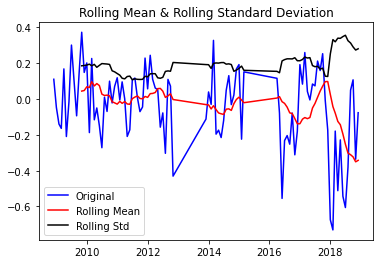

In [128]:
rolling_mean = df_log["SUICIDE"].rolling(window = 12).mean()
rolling_std = df_log["SUICIDE"].rolling(window = 12).std()
plt.plot(df_log["SUICIDE"], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [129]:
result = adfuller(df_log['SUICIDE'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -6.119676845924027
p-value: 8.917834962091246e-08
Critical Values:
	1%: -3.5003788874873405
	5%: -2.8921519665075235
	10%: -2.5830997960069446


In [70]:
#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = data
coint_johansen(johan_test_temp,-1,1).eig

C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\vector_ar\vecm.py:571: HypothesisTestWarning: Critical values are only available for time series with 12 variables at most.
  category=HypothesisTestWarning)


array([0.82206004, 0.76359234, 0.76146201, 0.70779858, 0.67567002,
       0.67535432, 0.65744511, 0.62657222, 0.5896482 , 0.58045956,
       0.54247511, 0.52638162, 0.50344238, 0.4701497 , 0.44048062,
       0.42495053, 0.39193816, 0.27858735, 0.2246811 ])

In [134]:
rolling_mean = data.rolling(window=12).mean()
data = data - rolling_mean
data.dropna(inplace=True)

In [91]:
data = data.diff().dropna()

In [135]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [136]:
import numpy as np
from sklearn.metrics import mean_squared_error
#converting predictions to dataframe
cols = data.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,len(data.columns)):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]
pred.index = valid.index
pred = pred.astype(float)
pred.columns = valid.columns
#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', np.sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for ASMA is :  81.2888253122606
rmse value for CANCER is :  200.8018467908109
rmse value for DIABETES_MELLITUS is :  32.34334932841295
rmse value for DOENCA_CARDIACA is :  92.94170343780051
rmse value for DOENCA_DE_PARKINSON is :  3.1940846679966395
rmse value for DORSOPATIAS is :  8.460652463603404
rmse value for DPOC is :  34.1906534384704
rmse value for ENXAQUECA is :  7.3661863586357965
rmse value for EPILEPSIA is :  21.64228093543789
rmse value for ESCLEROSE_MULTIPLA is :  12.399184090683391
rmse value for HIPERTENSAO is :  14.735161342132882
rmse value for HIV is :  13.573257086473083
rmse value for INSUFICIENCIA_CARDIACA is :  81.86221651183712
rmse value for INSUFICIENCIA_RENAL is :  17.839129039057113
rmse value for OSTEOPOROSE is :  11.40217285319174
rmse value for TECIDO_MOLE is :  28.019632678540628
rmse value for TRANSTORNOS_MENTAIS_E_COMPORTAMENTAIS is :  60.199435181855605
rmse value for TRAUMATISMO_INTRACRANIANO is :  43.91101011803482
rmse value for SUICIDE 

In [73]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

[[-41.41264387 154.81693119  34.93831899 -18.74777971  -3.01960072
   -2.63150104 -20.89148291   3.47235502  -1.03529891   6.15076153
   -1.47708997   0.35868961 -13.54681719   5.06449473   1.16959066
   22.52623972 -45.26914467 -40.71887091   1.4882536 ]]


C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


## Forecasting with VAR

https://towardsdatascience.com/multivariate-time-series-forecasting-653372b3db36

https://towardsdatascience.com/granger-causality-and-vector-auto-regressive-model-for-time-series-forecasting-3226a64889a6

Let's first look at suicide data

In [ ]:
df_final["SUICIDE"].plot();

In [ ]:
data = df_final[["CANCER", "TRANSTORNOS_MENTAIS_E_COMPORTAMENTAIS", "DPOC", "SUICIDE"]].copy()

Checking for null data

In [ ]:
data.isnull().sum()

Plotting

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    dataset = data[data.columns[i]]
    ax.plot(dataset, color='red', linewidth=1)
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
plt.tight_layout();

In [ ]:
from scipy import stats
def isGaussian(dataset):
    stat,p = stats.normaltest(dataset)
    print("Statistics = %.3f, p=%.3f" % (stat,p))
    alpha = 0.05
    if p> alpha:
        print('Data looks Gaussian (fail to reject null hypothesis)')
    else:
        print('Data looks non-Gaussian (reject null hypothesis)')
        
isGaussian(data.DPOC)
isGaussian(data.CANCER)
isGaussian(data.SUICIDE)
isGaussian(data.TRANSTORNOS_MENTAIS_E_COMPORTAMENTAIS)

Running Granger’s causality test

In [ ]:
# import for Granger's Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
granger_test = sm.tsa.stattools.grangercausalitytests(data[["CANCER", "SUICIDE"]], maxlag=2, verbose=True)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [ ]:
train = data.iloc[:-1]
test = data.iloc[[-1]]

In [ ]:
df_differenced= train.diff().dropna()
# model fitting
model = VAR(df_differenced)
results = model.fit(maxlags=15, ic='aic')
results.summary()

In [ ]:
# forecasting
lag_order = results.k_ar
results.forecast(data.values[-lag_order:], 5)

In [ ]:
# plotting
results.plot_forecast(2)

In [ ]:
model = VAR(train)
model_fit = model.fit()

In [ ]:
pred = model_fit.forecast(model_fit.y, steps=1)
print(pred)

In [ ]:
test

In [ ]:
plt.plot(data["CANCER"])

Exploring the relationship between suicide, cancer, DPOC and mental diseases

In [ ]:
chosen_columns = ["CANCER", "TRANSTORNOS_MENTAIS_E_COMPORTAMENTAIS", "DPOC"]

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Disease Rates')
for disease in chosen_columns:
        ax1.plot(df_final[disease])
plt.legend(chosen_columns, loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Suicide Rates', color='r')  # we already handled the x-label with ax1
ax2.plot(df_final["SUICIDE"],'--', color='r',linewidth=3.0)
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

count = 12
for label in ax1.get_xticklabels()[::1]:
    if(count < 11):
        label.set_visible(False)
        count += 1
    else:
        count = 0
    
plt.legend(["Suicide"])
plt.show()



In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_xlabel('Month/Year')
ax1.set_ylabel('Disease Rates')
for disease in chosen_columns:
        ax1.plot(df_final[disease].rolling(12).mean())
plt.legend(chosen_columns)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Suicide Rates', color='r')  # we already handled the x-label with ax1
ax2.plot(df_final["SUICIDE"].rolling(12).mean(),'--', color='r',linewidth=3.0)
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

count = 12
for label in ax1.get_xticklabels()[::1]:
    if(count < 11):
        label.set_visible(False)
        count += 1
    else:
        count = 0
    
plt.legend(["Suicide"],loc=1)
plt.show()



## EDA by city

In [ ]:
root = "../"
path = root + 'CSV/TabNet/Internacoes/'
all_files = glob.glob(path + "*")
df_diseases = pd.DataFrame()
list_of_diseases = []
for file in all_files:
    file_name = file.split("\\")[1]
    disease = file_name.split(".")[0]
    list_of_diseases.append(disease)
    df_disease = pd.read_csv(path + file_name, sep=";")
    df_disease = df_disease.replace("-",0)
    df_disease= df_disease.filter(regex='Município|2008|2009|2010|2011|2012|2013|2014|2015|2016|2017|2018', axis=1)
    df_disease = df_disease.melt(id_vars='Município', var_name='Month', value_name=disease)
    df_disease[disease] = df_disease[disease].astype(int)
    if df_diseases.empty:
        df_diseases = df_disease.copy()
    else:
        df_diseases = pd.merge(df_diseases, df_disease,  how='left', left_on=['Município','Month'], right_on = ['Município','Month'])
df_diseases = df_diseases.fillna(0)
df_diseases.head()

In [ ]:
path = root + 'CSV/TabNet/Suicides/'
all_files = glob.glob(path + "*")
df_suicides = pd.DataFrame()
for file in all_files:
    file_name = file.split("\\")[1]
    year = file_name.split("_")[1].split(".")[0]
    df_year = pd.read_csv(path + file_name, sep=";")
    df_year = df_year.replace("-",0)
    df_year = df_year.drop(columns="Total")
    df_year = df_year.melt(id_vars='Município', var_name='Month', value_name="SUICIDE")
    df_year["SUICIDE"] = df_year["SUICIDE"].astype(int)
    df_year["Month"] = df_year["Month"] + "/" + year
    df_suicides = pd.concat([df_suicides, df_year])
df_suicides.head()

In [ ]:
from datetime import datetime
month_dic = {
    "Janeiro": "January",
    "Fevereiro": "February",
    "Março": "March",
    "Abril": "April",
    "Maio": "May",
    "Junho": "June",
    "Julho": "July",
    "Agosto": "August",
    "Setembro": "September",
    "Outubro": "October",
    "Novembro": "November",
    "Dezembro": "December"
}
indexes = []
for i,e in enumerate(df_suicides["Month"]): 
    mes = e.split("/")[0]
    year = e.split("/")[1]
    month = month_dic[mes]
    date= month + " " + year 
    datetime_object = datetime.strptime(date, "%B %Y")
    indexes.append(datetime_object)
df_suicides["Month"] = indexes
df_suicides.head()

# ETC


In [ ]:
arr = [df_final[[disease]].rolling(12).mean() for disease in list_of_diseases]
df_rm = pd.concat(arr, axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)

In [ ]:
df_new = df_rm.fillna(0).iloc[11:][["CANCER", "DPOC"]]
df_new.head()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

granger_test = grangercausalitytests(df_new, maxlag=2, verbose=True)
granger_test

In [ ]:
# Augmented Dickey-Fuller Test (ADF Test)/unit root test
from statsmodels.tsa.stattools import adfuller
def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
adf_test(df_new["CANCER"])
adf_test(df_new["DPOC"])

In [ ]:
df_differenced= df_new.diff().dropna()
adf_test(df_differenced["CANCER"])
adf_test(df_differenced["DPOC"])

In [ ]:
from statsmodels.tsa.api import VAR
model= VAR(df_di)

In [ ]:
df_rm.plot(figsize=(20,10), ylim=(0,1000))

Seasonal patterns

In [ ]:
df_final.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)

In [ ]:
df_final.diff().corr()

In [ ]:
df_final.corr()

In [ ]:
pd.plotting.autocorrelation_plot(df_final[["CANCER"]]);

https://www.datacamp.com/community/tutorials/time-series-analysis-tutorial

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)

ax1.plot(df_final)
ax1.set_xticks(df_final.index)
ax1.axes.xaxis.set_ticklabels([])
plt.show()